## bioinformatics coursework 2 part 2

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import urllib as ul
import numpy as np
import pronto
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

In [7]:
# task 1

df = pd.read_csv("gencc-submissions.tsv", sep="\t")
print("length of gcc df =", len(df))
full_length = len(df)
# this was super tricky, HP:000005 is a default im pretty sure, so all entries with this moi_curie have unknown inheritances
# cleaning elements with invalid moi_curies
#df.dropna(subset = ['moi_curie', 'submitted_as_moi_id', 'submitted_as_moi_name'], inplace=True)
df.drop(df[df['submitted_as_moi_name'] == 'Unknown inheritance'].index, inplace=True) # this might not make sense
df.drop(df[df['moi_title'] == 'Unknown'].index, inplace=True)
print("length of gcc df elements with a non-nan moi curie =", len(df))
cleaned_length = len(df)

# all elements have a moi curie or do theyyyy, you cheeky man Ian

print(f"entries with valid moi's = {cleaned_length / full_length *100}%")

# sanity check (should be = 0):
#print(len(df[df['moi_curie'] == 'HP:0000005']))



length of gcc df = 18504
length of gcc df elements with a non-nan moi curie = 18175
entries with valid moi's = 98.22200605274534%


In [8]:
# task 2
# NOTE: is this right? submitted_as_moi_name gets the same thing??

gcc_df=df
hp=pronto.Ontology("hp.obo")

unique_moi_curies = gcc_df['moi_curie'].unique()
#print(unique_moi_curies)

modes_of_inheritence = []
hp_terms = unique_moi_curies
for hp_term in hp_terms:
    #print(f"{hp_term}- mode of inheritence: {hp[hp_term].name}")
    modes_of_inheritence.append(hp[hp_term].name)
    
table = PrettyTable()
table.add_column("moi curie", unique_moi_curies)
table.add_column("mode of inheritance name",modes_of_inheritence)
print(table, "\n\n")

inheritance_df = pd.DataFrame(zip(unique_moi_curies, modes_of_inheritence), columns=["moi_curie", "mode_of_inheritance_name"])

# merge with gcc df:
merged_df = gcc_df.merge(right=inheritance_df, how='inner', on=['moi_curie'])

# present results as a table??


C:\Users\andre\AppData\Local\Temp\ipykernel_22156\3470013937.py:5: UnicodeWarning: unsound encoding, assuming ISO-8859-1 (73% confidence)
  hp=pronto.Ontology("hp.obo")


+------------+---------------------------------------------------------+
| moi curie  |                 mode of inheritance name                |
+------------+---------------------------------------------------------+
| HP:0000006 |              Autosomal dominant inheritance             |
| HP:0000007 |             Autosomal recessive inheritance             |
| HP:0001417 |                   X-linked inheritance                  |
| HP:0001450 |                   Y-linked inheritance                  |
| HP:0001419 |              X-linked recessive inheritance             |
| HP:0001423 |              X-linked dominant inheritance              |
| HP:0012275 | Autosomal dominant inheritance with maternal imprinting |
| HP:0001442 |              Typified by somatic mosaicism              |
| HP:0001427 |                Mitochondrial inheritance                |
| HP:0012274 | Autosomal dominant inheritance with paternal imprinting |
| HP:0010984 |                   Digenic inheritanc

C:\Users\andre\AppData\Local\Temp\ipykernel_22156\4105617493.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=list(mode_counts.keys()), y=list(mode_counts.values()), palette=sns.color_palette("BuGn_r", n_colors=len(mode_counts)+4), ax=ax)
C:\Users\andre\AppData\Local\Temp\ipykernel_22156\4105617493.py:25: UserWarning: The palette list has more values (16) than needed (12), which may not be intended.
  g = sns.barplot(x=list(mode_counts.keys()), y=list(mode_counts.values()), palette=sns.color_palette("BuGn_r", n_colors=len(mode_counts)+4), ax=ax)
C:\Users\andre\AppData\Local\Temp\ipykernel_22156\4105617493.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels, rotation=0, horizontalalignment='center', fontsize=9)


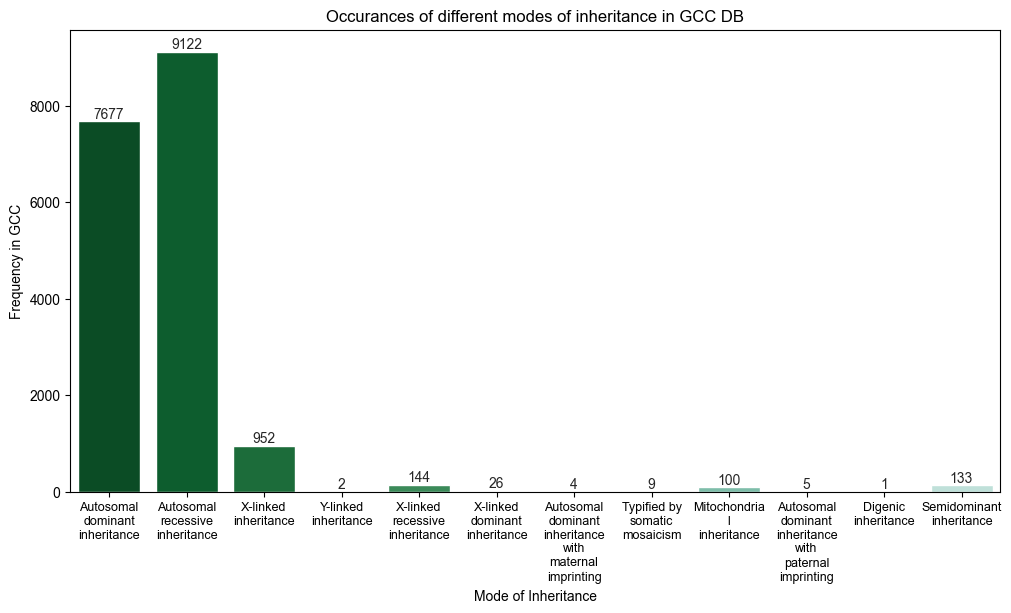

In [9]:
# Task 3
# plot as a barchart??????

# gonna plot # of modes of inheritance

mega_modes_of_inheritance = merged_df['mode_of_inheritance_name']

def count_modes(modes_arr):
    d={}
    for mode in modes_arr:
        if mode in d:
            d[mode] += 1
        else:
            d[mode] = 1
    return d

mode_counts = count_modes(mega_modes_of_inheritance)
# fig, ax = plt.subplots(figsize=(12, 6))
# plt.xticks(np.arange(2011, 2023+1, 1), rotation=45)
# sns.barplot(x=list(mode_counts.keys()), y=list(mode_counts.values()))


fig, ax = plt.subplots(figsize=(12, 6))
sns.set_style("darkgrid")
g = sns.barplot(x=list(mode_counts.keys()), y=list(mode_counts.values()), palette=sns.color_palette("BuGn_r", n_colors=len(mode_counts)+4), ax=ax)

for i in ax.containers:
    ax.bar_label(i,)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
g.set_xticklabels(labels, rotation=0, horizontalalignment='center', fontsize=9)
plt.title("Occurances of different modes of inheritance in GCC DB", fontsize='large')
plt.ylabel("Frequency in GCC")
plt.xlabel("Mode of Inheritance")
plt.show()




In [10]:
# Task 4
# Why do you think the distribution of MOIs looks the way it does in the barchart?

# lookup autosomal dominant and recessive inheritance, to see way they're so domininant
# think it means that its inherited by number and not by sex? 

# https://my.clevelandclinic.org/health/body/23078-autosomal-dominant--autosomal-recessive